# **STEP 1 | IMPORTING LIBRARIES & DATASET**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/products_campaign_sales(in).csv", encoding = "latin1")

# **STEP 2 | INITIAL DATA INSPECTION & SUMMARY STATISTICS**

In [6]:
# Quick Overview
print("Shape of the dataset:", df.shape)
print("\n--- COLUMN INFO ---")
df.info()

Shape of the dataset: (731, 11)

--- COLUMN INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [7]:
# Display first few rows
print("\n--- FIRST 5 ROWS ---")
display(df.head())


--- FIRST 5 ROWS ---


,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [8]:
# Summary statistics for numerical columns
print("\n--- DESCRIPTIVE STATISTICS (NUMERIC) ---")
display(df.describe().T)


--- DESCRIPTIVE STATISTICS (NUMERIC) ---


,count,mean,std,min,25%,50%,75%,max
limit_infor,731.0,0.042408,0.404911,0.00,0.00,0.00,0.00,10.00
campaign_type,731.0,2.997264,2.004787,0.00,1.00,3.00,5.00,6.00
campaign_level,731.0,0.683995,0.465233,0.00,0.00,1.00,1.00,1.00
product_level,731.0,1.395349,0.544894,1.00,1.00,1.00,2.00,3.00
resource_amount,731.0,4.952120,1.838449,1.00,3.00,5.00,7.00,9.00
email_rate,731.0,0.474337,0.162913,0.08,0.34,0.49,0.61,0.84
price,729.0,162.812071,14.267136,100.00,152.00,163.00,173.00,197.00
discount_rate,731.0,0.809617,0.077679,0.49,0.77,0.82,0.87,0.98
hour_resouces,731.0,848.176471,686.622488,2.00,315.50,713.00,1096.00,3410.00
campaign_fee,731.0,3696.391245,1908.643139,20.00,2497.00,3662.00,4795.50,33380.00


In [9]:
# Frequency counts for categorical columns
print("\n--- CATEGORICAL VALUE COUNTS (Top 10 each) ---")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print(f"\nColumn: {col}")
    display(df[col].value_counts().head(10))


--- CATEGORICAL VALUE COUNTS (Top 10 each) ---


In [10]:
# Missing values check
print("\n--- MISSING VALUES CHECK ---")
missing = df.isnull().sum().to_frame("Missing_Values")
missing["Missing_%"] = (missing["Missing_Values"]/len(df)*100).round(2)
display(missing)


--- MISSING VALUES CHECK ---


,Missing_Values,Missing_%
limit_infor,0,0.00
campaign_type,0,0.00
campaign_level,0,0.00
product_level,0,0.00
resource_amount,0,0.00
email_rate,0,0.00
price,2,0.27
discount_rate,0,0.00
hour_resouces,0,0.00
campaign_fee,0,0.00


In [11]:
# Duplicate rows check
print("\n--- DUPLICATE ROWS CHECK ---")
print("Number of duplicate rows:", df.duplicated().sum())


--- DUPLICATE ROWS CHECK ---
Number of duplicate rows: 0


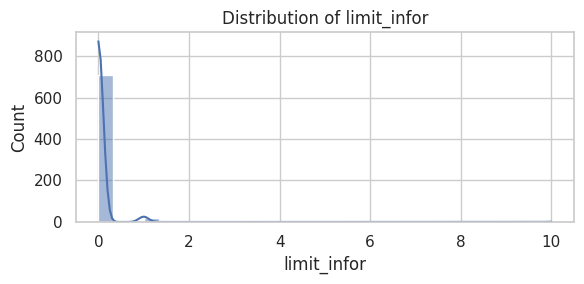

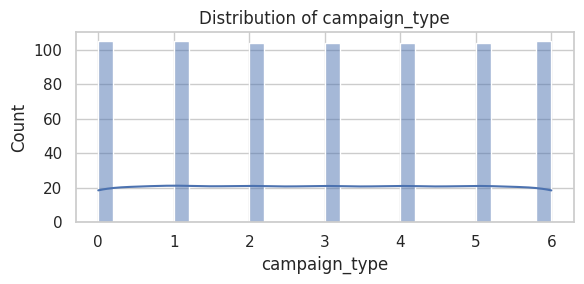

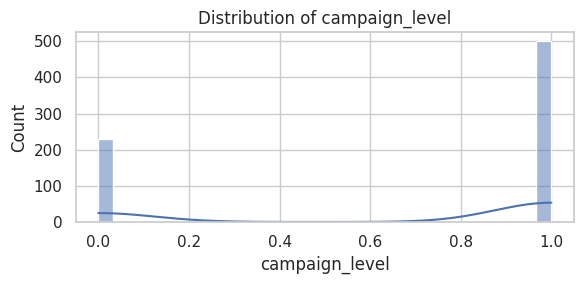

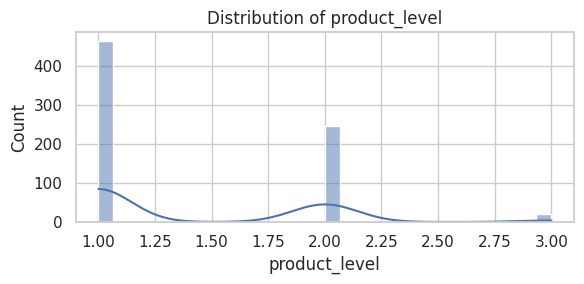

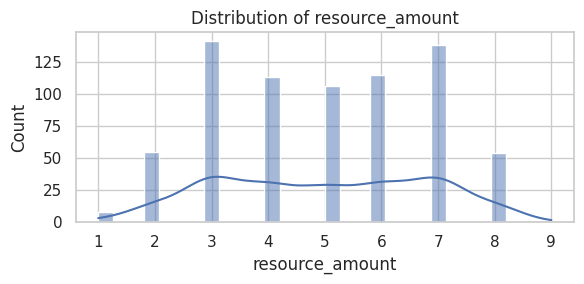

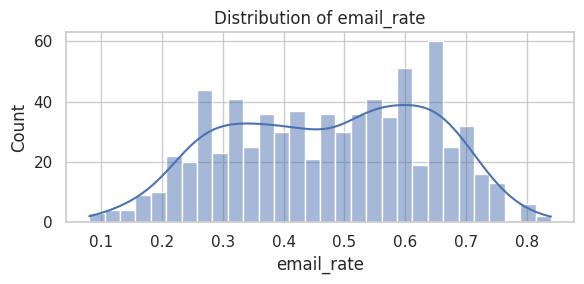

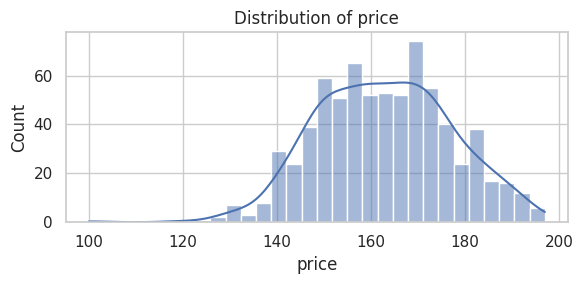

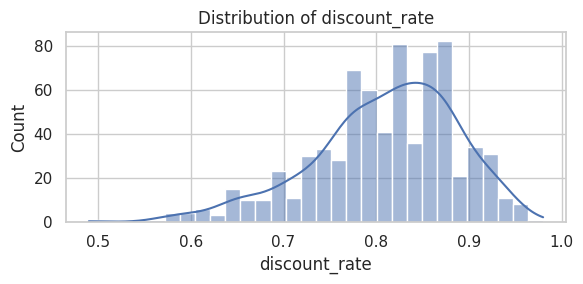

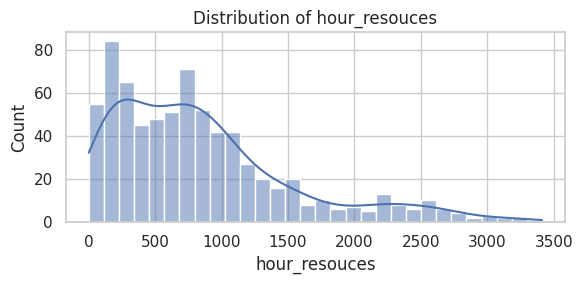

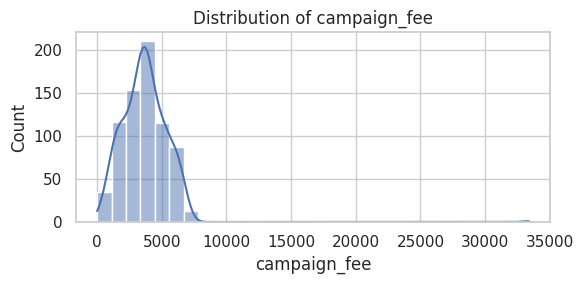

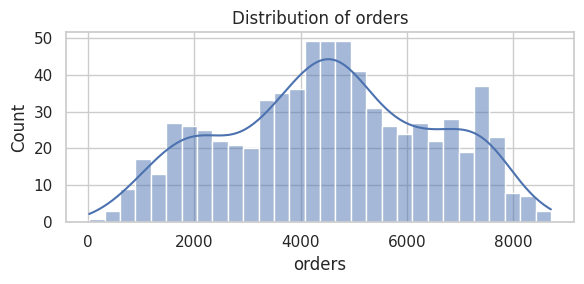

In [12]:
# Basic Univariate Visualization for Numeric Columns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

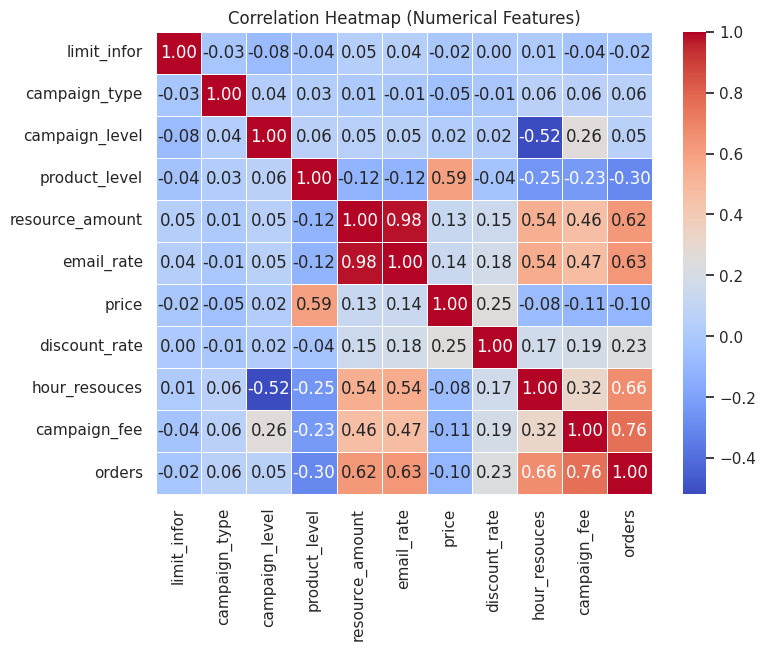

In [13]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# **STEP 3 | DATA CLEANING & FEATURE UNDERSTANDING**

In [14]:
# Handling Missing Values
print("Missing values before handling:\n", df.isnull().sum())

# Only 'price' has 2 missing → fill with median (robust against outliers)
df['price'].fillna(df['price'].median(), inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values before handling:
 limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              2
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64

Missing values after handling:
 limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              0
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64


In [15]:
# Checking for Outliers (IQR Method)
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count']/len(df)*100).round(2)
print("\n--- OUTLIER SUMMARY ---")
display(outlier_df)


--- OUTLIER SUMMARY ---


,Outlier_Count,Outlier_%
limit_infor,22,3.01
campaign_type,0,0.00
campaign_level,0,0.00
product_level,0,0.00
resource_amount,0,0.00
email_rate,0,0.00
price,2,0.27
discount_rate,16,2.19
hour_resouces,44,6.02
campaign_fee,1,0.14


In [16]:
# Log Transformation for Highly Skewed Columns
# We'll transform only where it makes sense (values > 0)
skewed_cols = ['limit_infor', 'hour_resouces', 'campaign_fee', 'orders']
for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p handles zeros gracefully

In [17]:
# Derived / Engineered Features
df['total_campaign_cost'] = df['campaign_fee'] + (df['hour_resouces'] * 0.5)
df['discount_value'] = df['price'] * df['discount_rate']
df['effective_price'] = df['price'] - df['discount_value']
df['resource_efficiency'] = df['orders'] / (df['hour_resouces'] + 1)

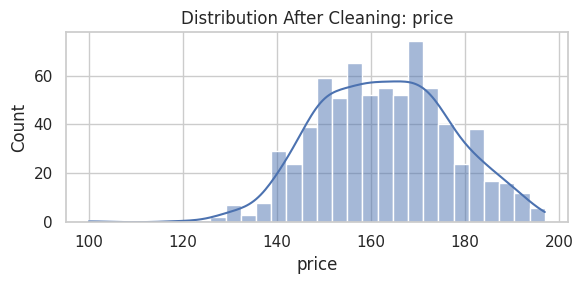

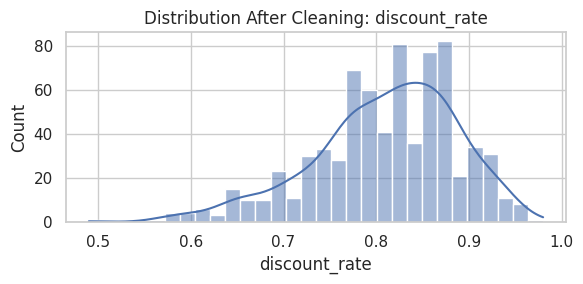

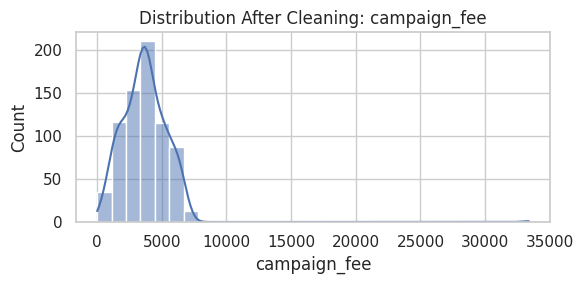

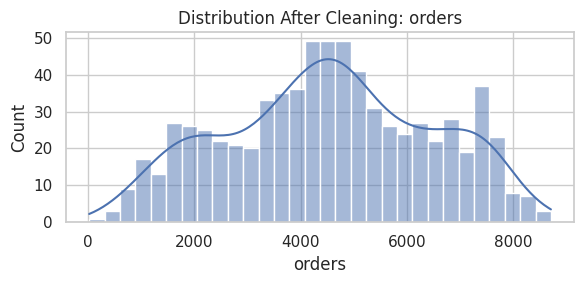

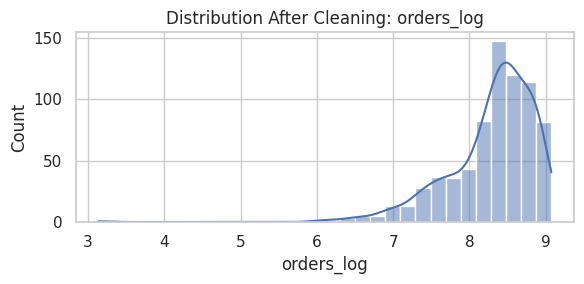

In [18]:
# Quick Distribution Plots (After Transformation)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

cols_to_plot = ['price', 'discount_rate', 'campaign_fee', 'orders', 'orders_log']
for col in cols_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution After Cleaning: {col}")
    plt.tight_layout()
    plt.show()

In [19]:
# Save Cleaned Dataset Snapshot
df.to_csv("products_campaign_cleaned.csv", index=False)
print("\n✅ Data cleaning completed successfully!")
print("Saved as: products_campaign_cleaned.csv")


✅ Data cleaning completed successfully!
Saved as: products_campaign_cleaned.csv


# **STEP 4 | EXPLORATORY DATA ANALYSIS**

=== UNIVARIATE ANALYSIS ===


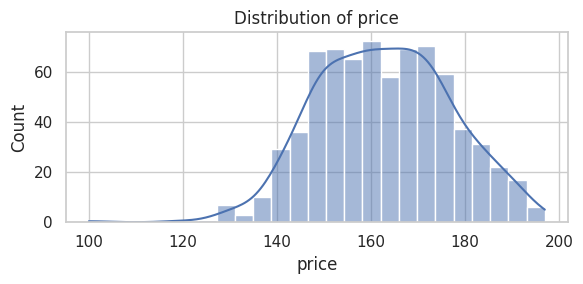

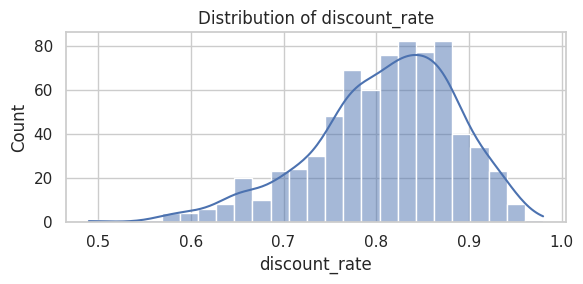

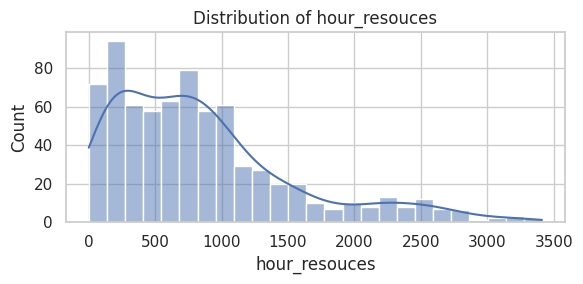

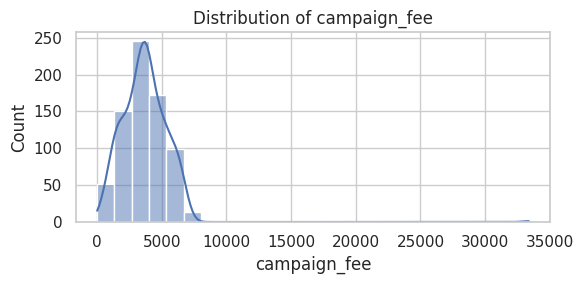

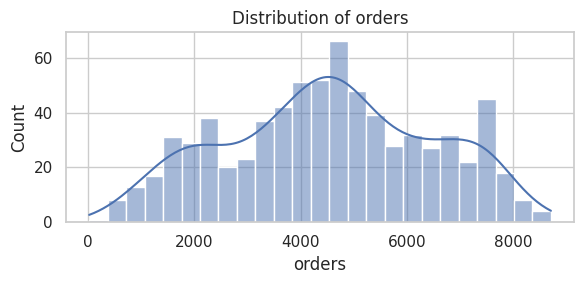

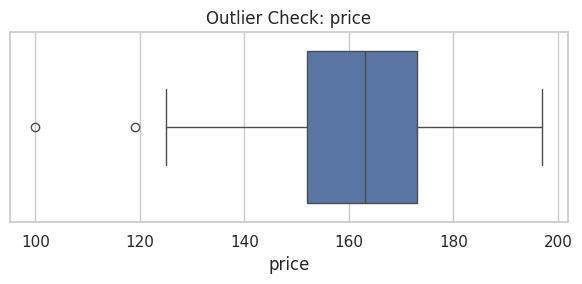

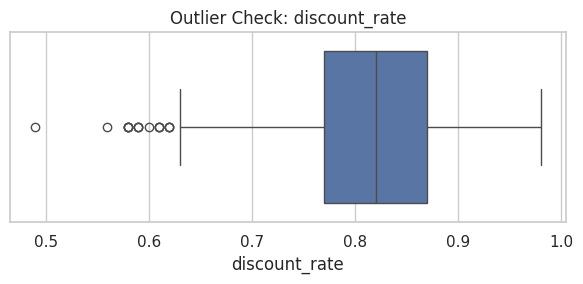

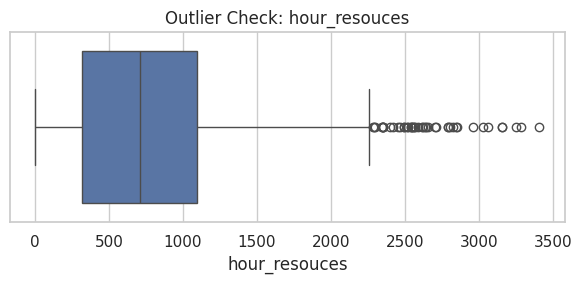

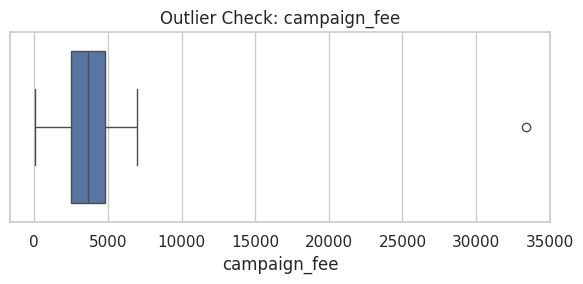

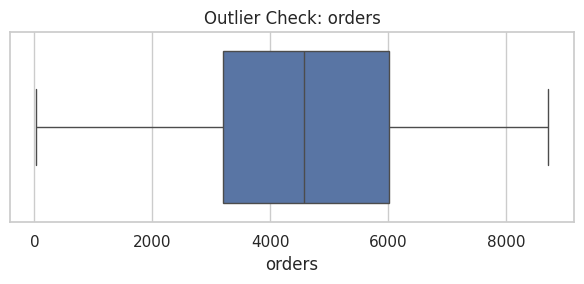

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# UNIVARIATE ANALYSIS
print("=== UNIVARIATE ANALYSIS ===")
num_cols = ['price', 'discount_rate', 'hour_resouces', 'campaign_fee', 'orders']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Boxplots for outlier visual confirmation
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.tight_layout()
    plt.show()

=== BIVARIATE ANALYSIS ===


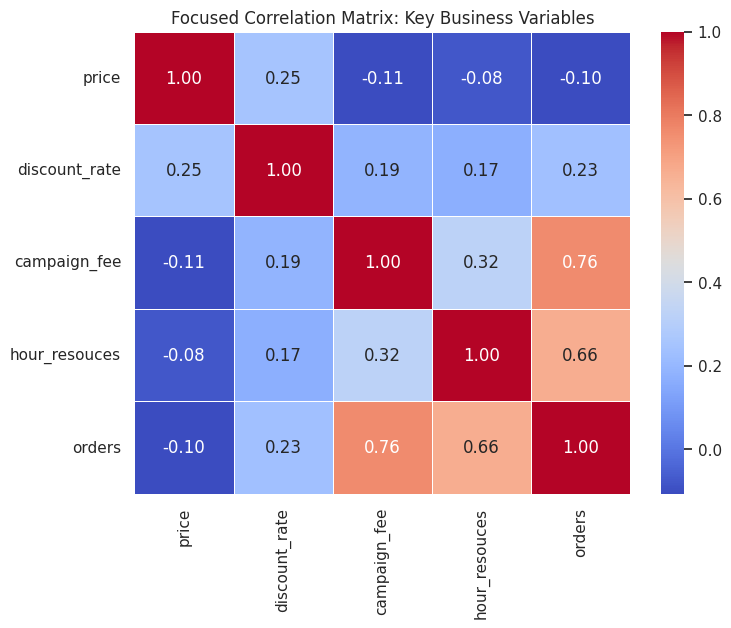

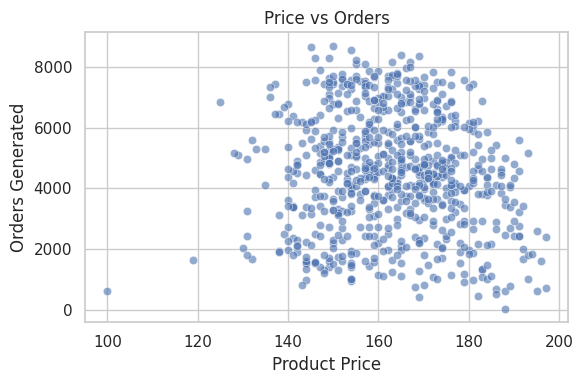

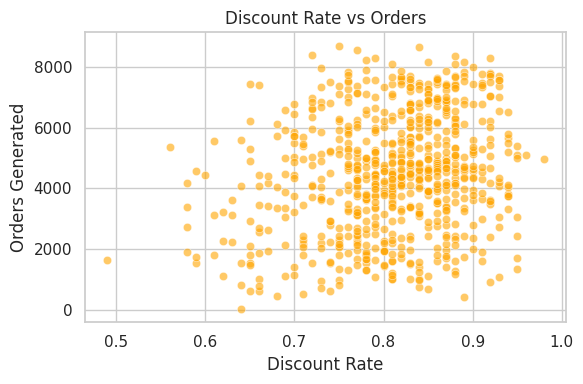

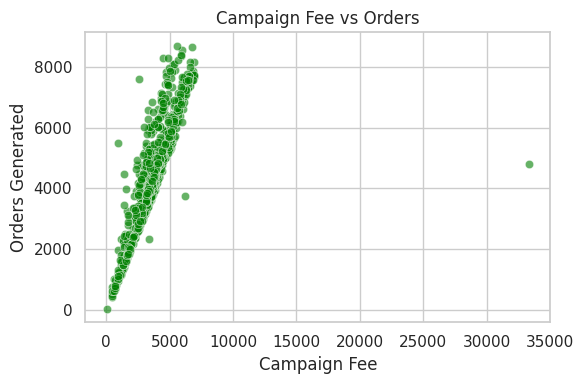

In [21]:
# BIVARIATE ANALYSIS — Numerical Relationships
print("=== BIVARIATE ANALYSIS ===")

# Correlation Heatmap (already done but filtered to key business metrics)
plt.figure(figsize=(8,6))
sns.heatmap(df[['price','discount_rate','campaign_fee','hour_resouces','orders']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Focused Correlation Matrix: Key Business Variables")
plt.show()

# Price vs Orders
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='orders', data=df, alpha=0.6)
plt.title("Price vs Orders")
plt.xlabel("Product Price")
plt.ylabel("Orders Generated")
plt.tight_layout()
plt.show()

# Discount vs Orders
plt.figure(figsize=(6,4))
sns.scatterplot(x='discount_rate', y='orders', data=df, color='orange', alpha=0.6)
plt.title("Discount Rate vs Orders")
plt.xlabel("Discount Rate")
plt.ylabel("Orders Generated")
plt.tight_layout()
plt.show()

# Campaign Fee vs Orders
plt.figure(figsize=(6,4))
sns.scatterplot(x='campaign_fee', y='orders', data=df, alpha=0.6, color='green')
plt.title("Campaign Fee vs Orders")
plt.xlabel("Campaign Fee")
plt.ylabel("Orders Generated")
plt.tight_layout()
plt.show()

=== CATEGORICAL vs NUMERICAL ===


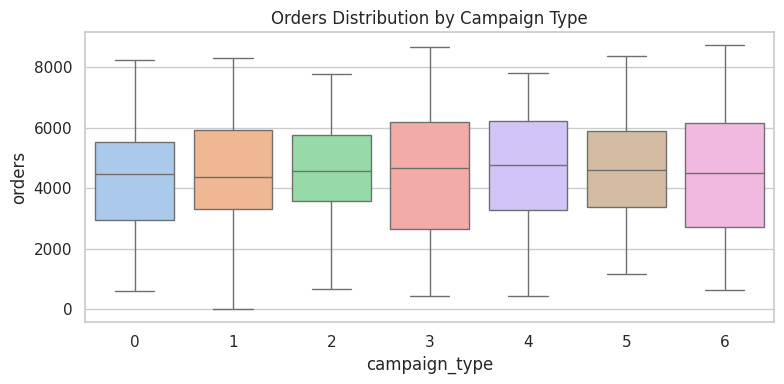

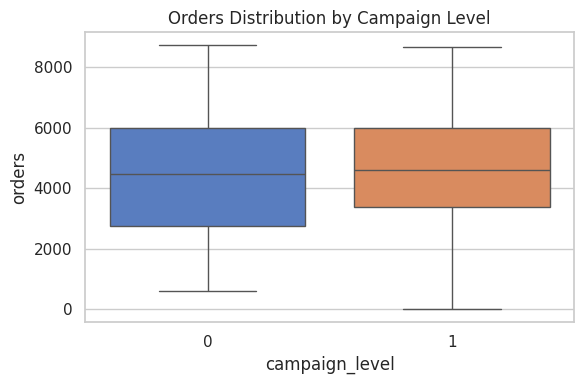

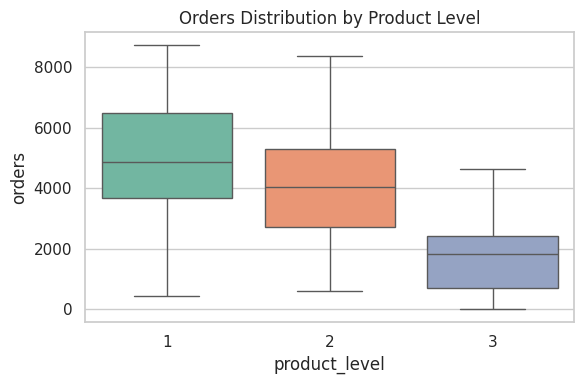

In [22]:
# CATEGORICAL vs NUMERICAL (Campaign Impact)
print("=== CATEGORICAL vs NUMERICAL ===")

# Campaign Type vs Orders
plt.figure(figsize=(8,4))
sns.boxplot(x='campaign_type', y='orders', data=df, palette='pastel')
plt.title("Orders Distribution by Campaign Type")
plt.tight_layout()
plt.show()

# Campaign Level vs Orders
plt.figure(figsize=(6,4))
sns.boxplot(x='campaign_level', y='orders', data=df, palette='muted')
plt.title("Orders Distribution by Campaign Level")
plt.tight_layout()
plt.show()

# Product Level vs Orders
plt.figure(figsize=(6,4))
sns.boxplot(x='product_level', y='orders', data=df, palette='Set2')
plt.title("Orders Distribution by Product Level")
plt.tight_layout()
plt.show()

=== INSIGHTFUL FEATURES ===


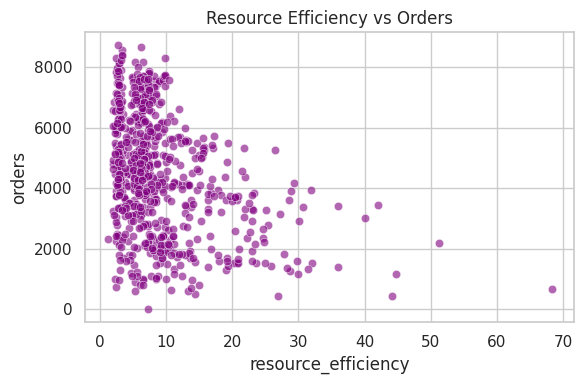

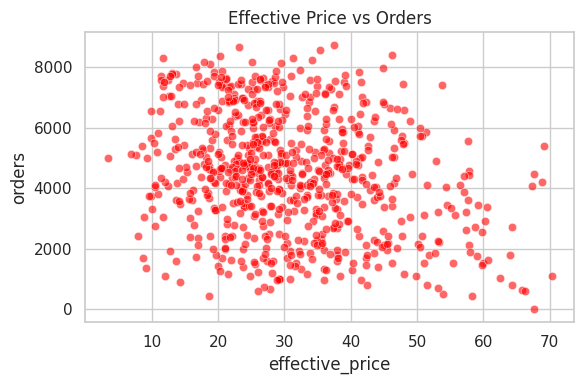

In [23]:
# INSIGHTFUL FEATURE RELATIONSHIPS
print("=== INSIGHTFUL FEATURES ===")

# Resource Efficiency vs Orders
plt.figure(figsize=(6,4))
sns.scatterplot(x='resource_efficiency', y='orders', data=df, alpha=0.6, color='purple')
plt.title("Resource Efficiency vs Orders")
plt.tight_layout()
plt.show()

# Effective Price vs Orders
plt.figure(figsize=(6,4))
sns.scatterplot(x='effective_price', y='orders', data=df, alpha=0.6, color='red')
plt.title("Effective Price vs Orders")
plt.tight_layout()
plt.show()

# **STEP 4.2 | EXPANDED EDA + OUTLIER TREATMENT**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

sns.set(style="whitegrid")

# OUTLIER TREATMENT (WINSORIZATION)
cols_to_cap = ['hour_resouces', 'campaign_fee', 'discount_rate', 'price']

for col in cols_to_cap:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # capping extreme 1%

print("✅ Outliers treated using Winsorization (1% capping).\n")

✅ Outliers treated using Winsorization (1% capping).



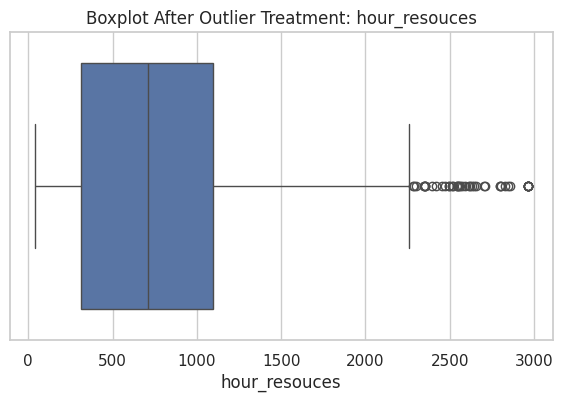

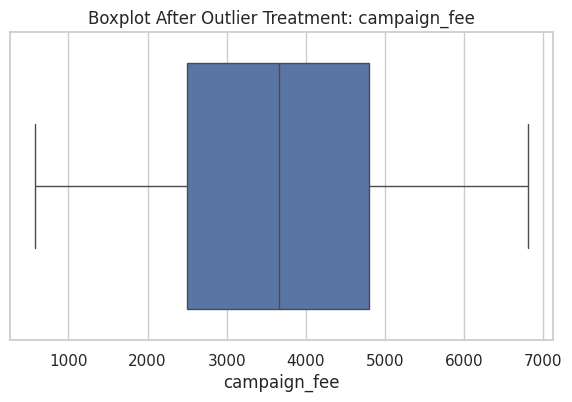

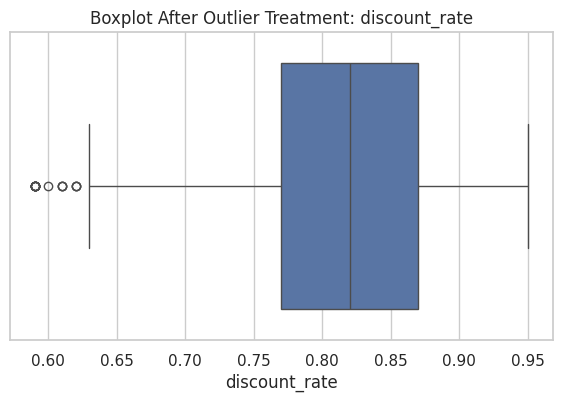

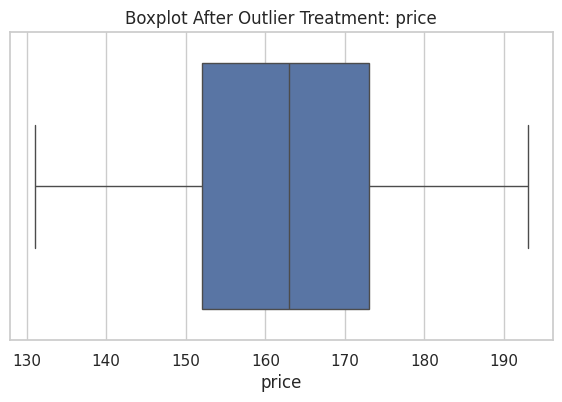

In [25]:
# UPDATED DISTRIBUTIONS AFTER OUTLIER FIX
for col in cols_to_cap:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Outlier Treatment: {col}")
    plt.show()

<Figure size 1000x800 with 0 Axes>

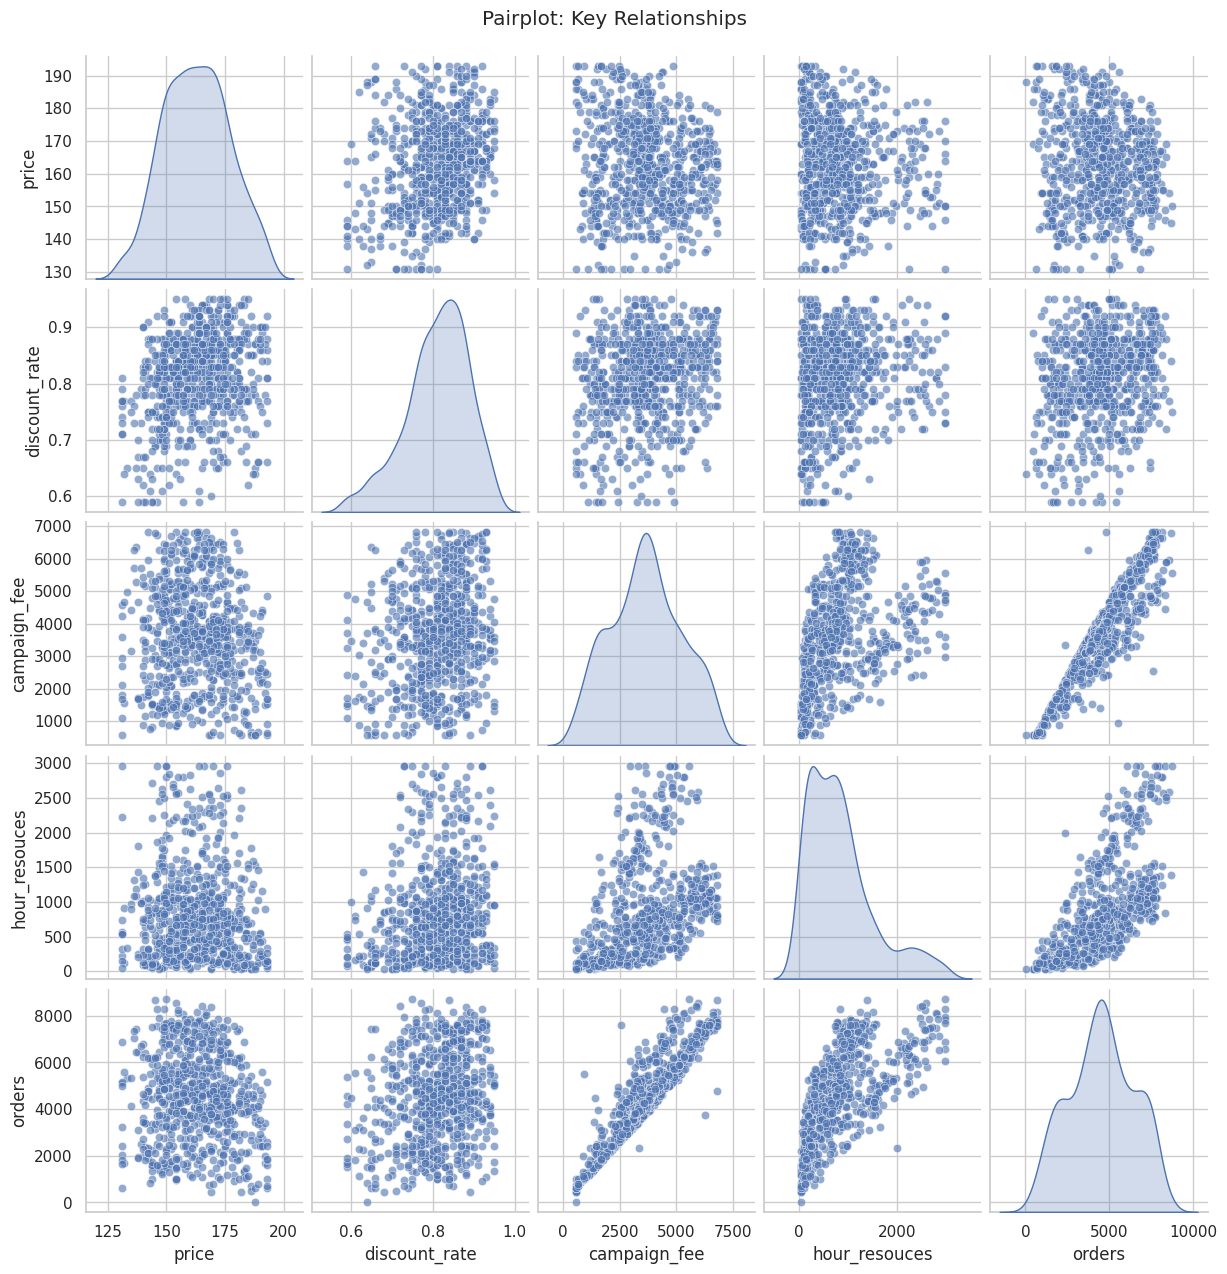

In [26]:
# PAIRPLOT (Key Numerical Features)
plt.figure(figsize=(10,8))
sns.pairplot(df[['price','discount_rate','campaign_fee','hour_resouces','orders']],
             diag_kind="kde",
             plot_kws={"alpha":0.6})
plt.suptitle("Pairplot: Key Relationships", y=1.02)
plt.show()

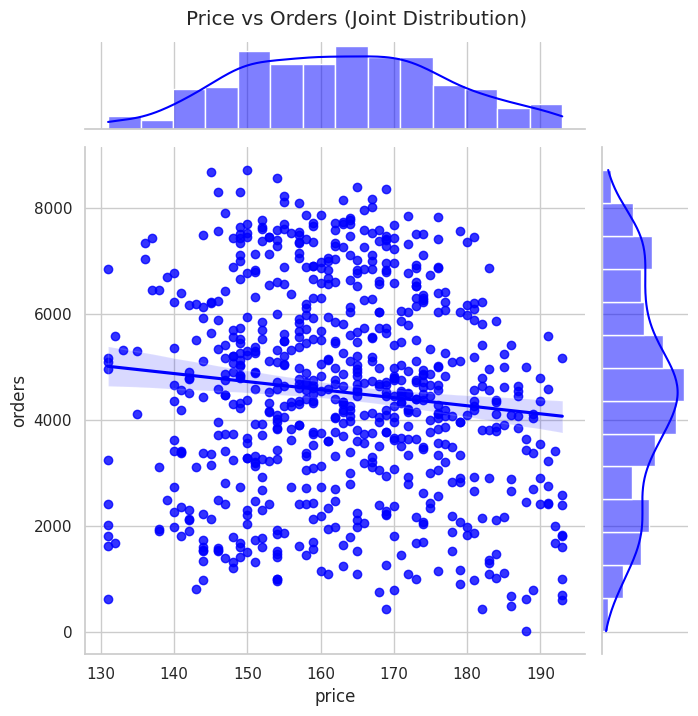

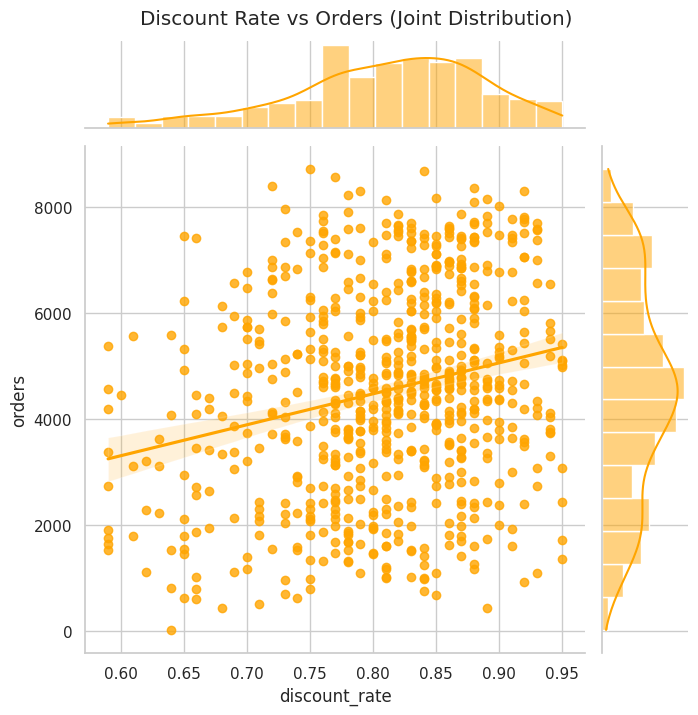

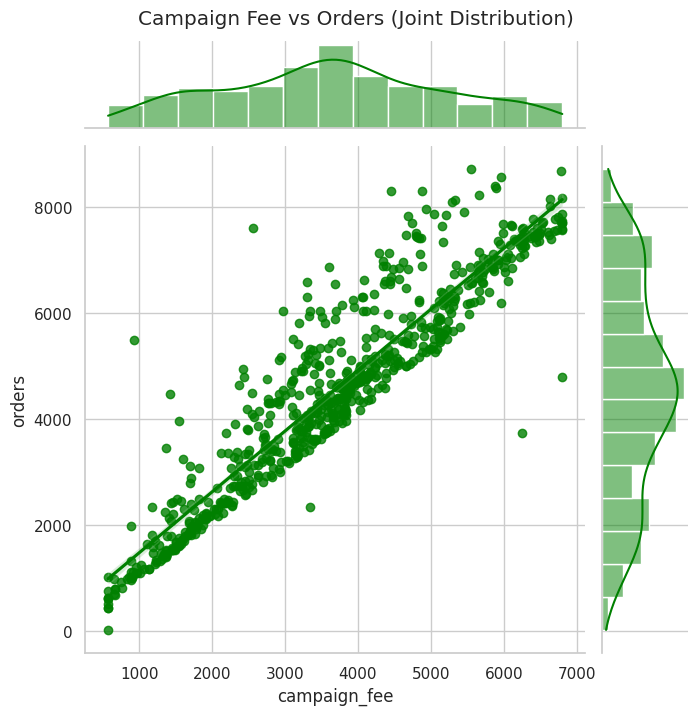

In [27]:
# JOINTPLOTS (Deep Dive on Important Relationships)
sns.jointplot(x='price', y='orders', data=df, kind='reg', height=7, color='blue')
plt.suptitle("Price vs Orders (Joint Distribution)", y=1.02)
plt.show()

sns.jointplot(x='discount_rate', y='orders', data=df, kind='reg', height=7, color='orange')
plt.suptitle("Discount Rate vs Orders (Joint Distribution)", y=1.02)
plt.show()

sns.jointplot(x='campaign_fee', y='orders', data=df, kind='reg', height=7, color='green')
plt.suptitle("Campaign Fee vs Orders (Joint Distribution)", y=1.02)
plt.show()

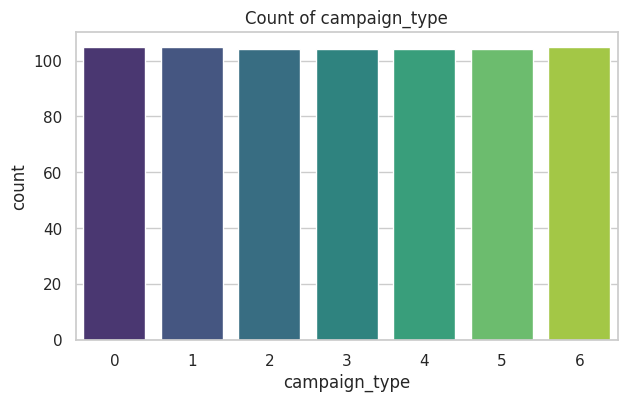

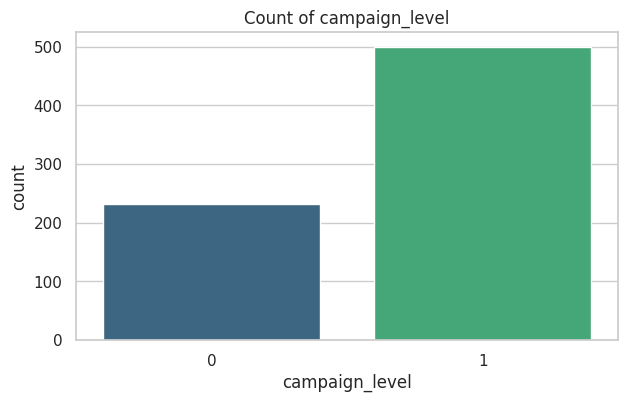

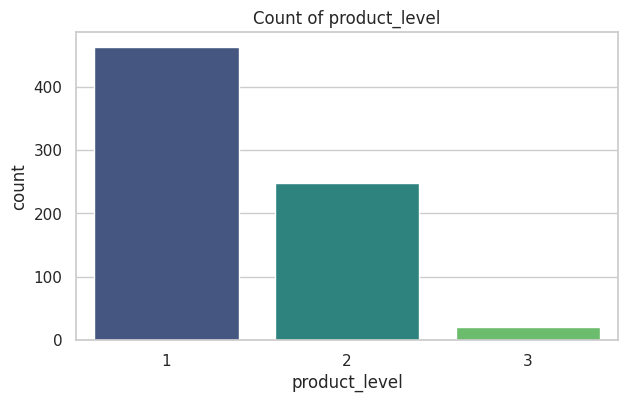

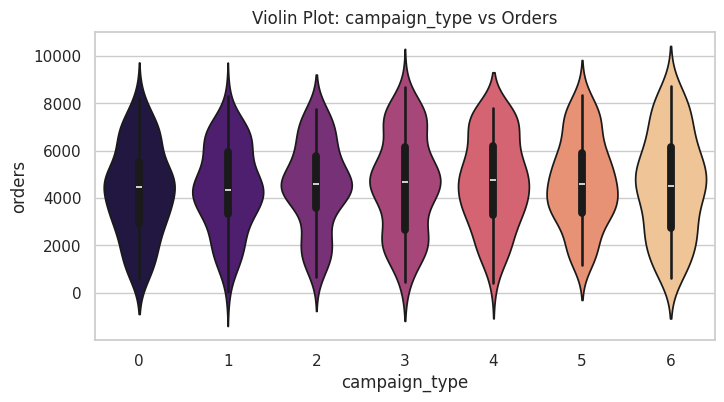

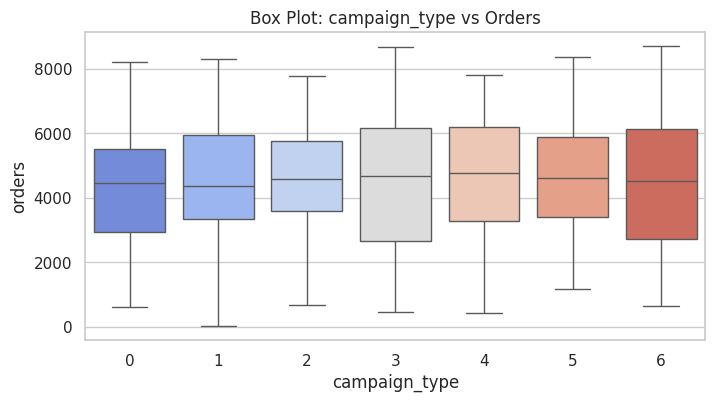

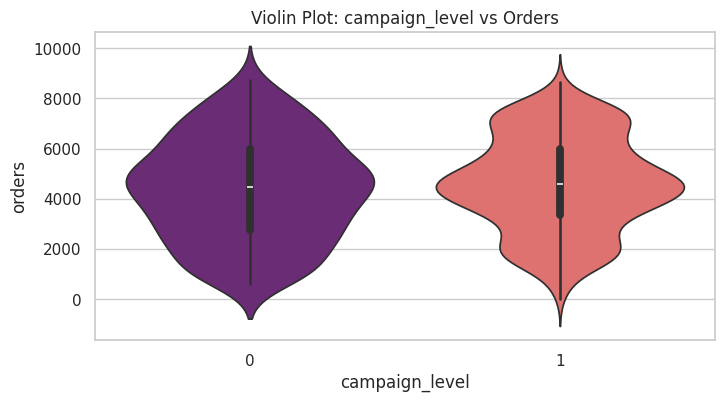

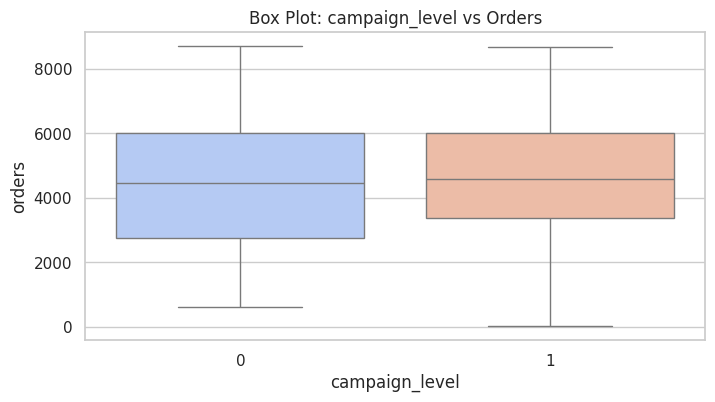

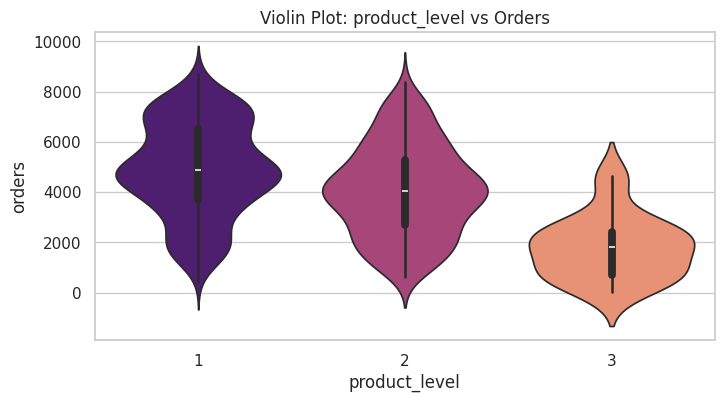

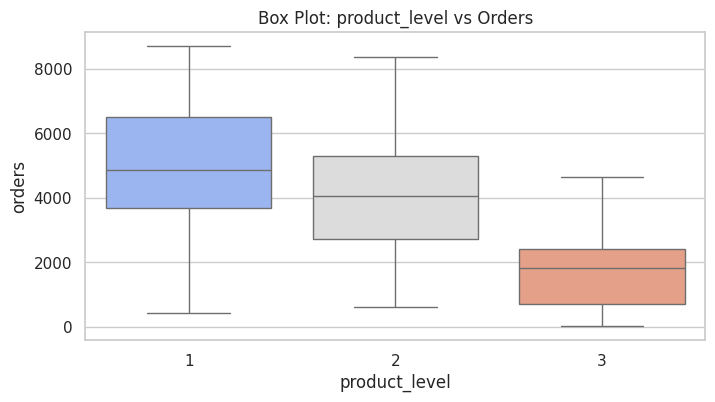

In [28]:
# CATEGORICAL ANALYSIS (Expanded)

# Distribution counts
cat_cols = ['campaign_type','campaign_level','product_level']

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Count of {col}")
    plt.show()

# Category vs Orders (Violin + Box)
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(x=col, y='orders', data=df, palette="magma")
    plt.title(f"Violin Plot: {col} vs Orders")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y='orders', data=df, palette="coolwarm")
    plt.title(f"Box Plot: {col} vs Orders")
    plt.show()

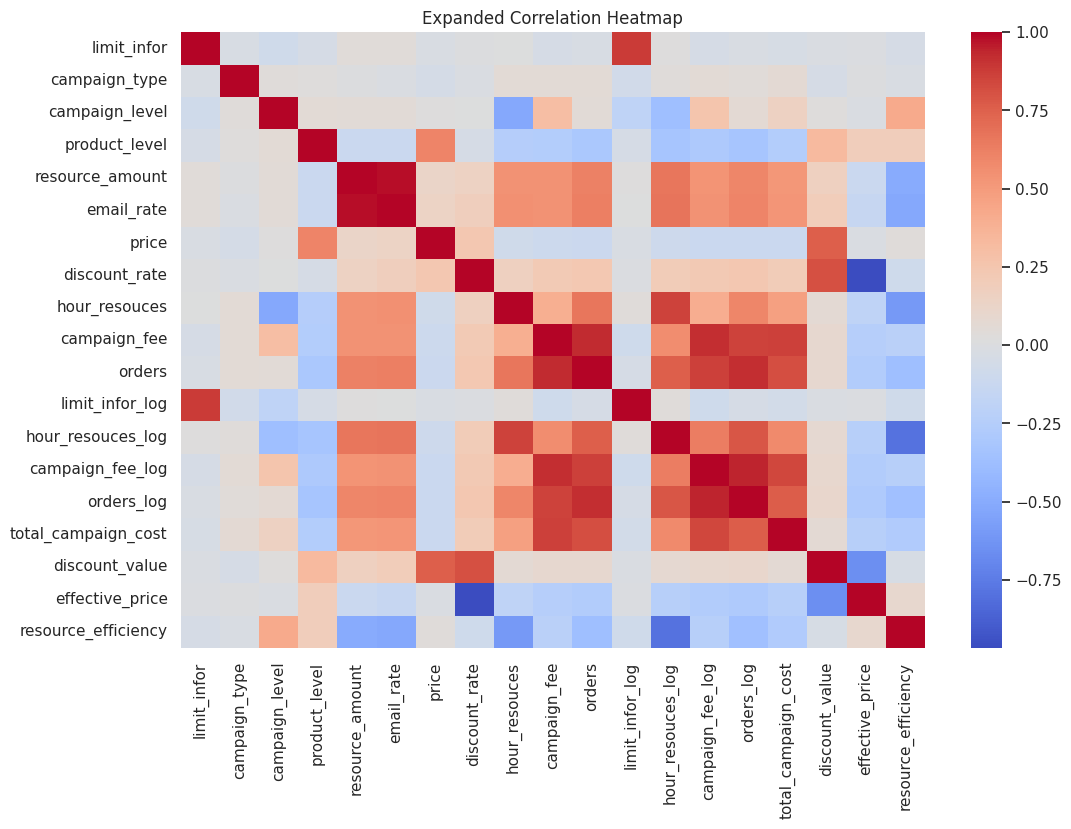

In [29]:
# CORRELATION HEATMAP (Expanded)

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Expanded Correlation Heatmap")
plt.show()

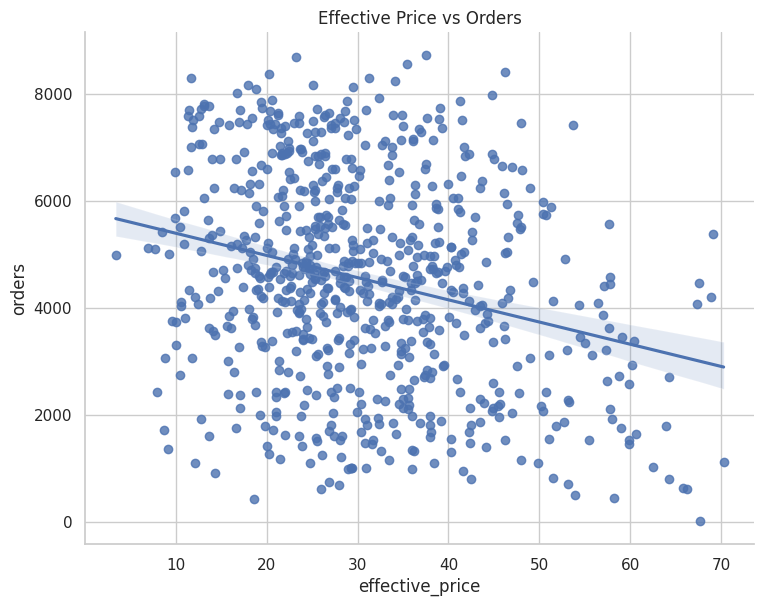

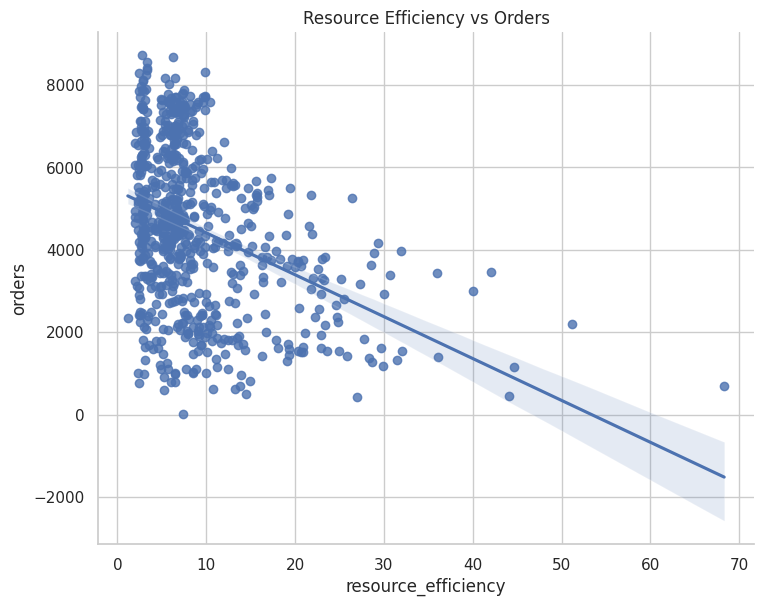

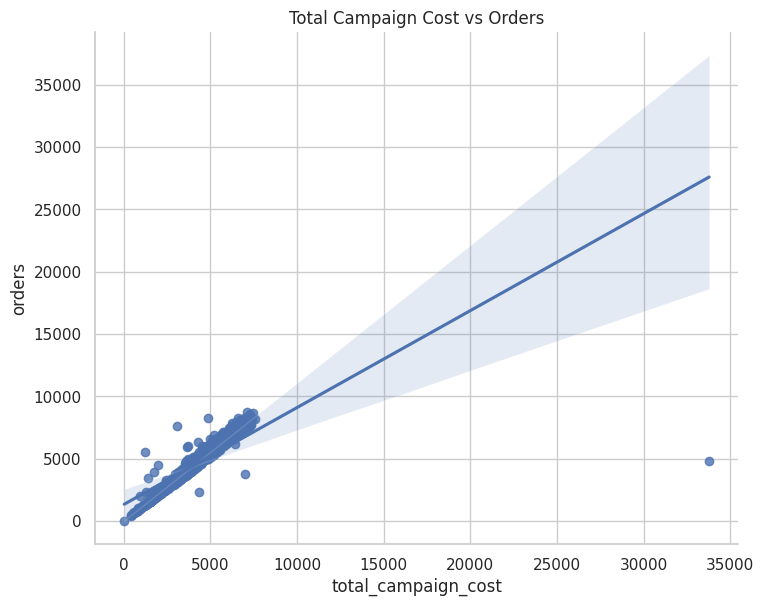


✅ Expanded EDA completed successfully!


In [30]:
# FEATURE RELATIONSHIP (REGPLOTS)

sns.lmplot(x='effective_price', y='orders', data=df, height=6, aspect=1.3)
plt.title("Effective Price vs Orders")
plt.show()

sns.lmplot(x='resource_efficiency', y='orders', data=df, height=6, aspect=1.3)
plt.title("Resource Efficiency vs Orders")
plt.show()

sns.lmplot(x='total_campaign_cost', y='orders', data=df, height=6, aspect=1.3)
plt.title("Total Campaign Cost vs Orders")
plt.show()

print("\n✅ Expanded EDA completed successfully!")

# **STEP 6 | TRAIN 7 MODELS (unique names) + COMPREHENSIVE METRICS**

In [31]:
import time
import joblib
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    median_absolute_error, explained_variance_score, max_error
)

# ---------- Prepare features & target (consistent with earlier plan) ----------
features = [
    'limit_infor',
    'campaign_type',
    'campaign_level',
    'product_level',
    'resource_amount',
    'email_rate',
    'price',
    'discount_rate',
    'hour_resouces',
    'campaign_fee',
    # engineered features created earlier
    'effective_price',
    'resource_efficiency',
    'total_campaign_cost'
]

# Ensure all features exist
missing_feats = [c for c in features if c not in df.columns]
if missing_feats:
    raise ValueError(f"Missing expected features in df: {missing_feats}")

X = df[features].copy()
y = df['orders'].copy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for deployment
joblib.dump(scaler, "scaler_timestamped.pkl")

# ---------- Metric helpers ----------
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true_safe = np.where(y_true==0, 1e-8, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

def rmsle(y_true, y_pred):
    y_true_clipped = np.maximum(0, y_true)
    y_pred_clipped = np.maximum(0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_true_clipped) - np.log1p(y_pred_clipped))**2))

# ---------- Models list with unique names ----------
ts = int(time.time())
models = [
    (f"linear_lr_v{ts}", LinearRegression()),
    (f"ridge_v{ts}", Ridge(alpha=1.0, random_state=42)),
    (f"dtree_v{ts}", DecisionTreeRegressor(random_state=42, max_depth=8)),
    (f"rf_v{ts}", RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)),
    (f"gbr_v{ts}", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, random_state=42)),
    (f"xgb_v{ts}", XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=6, random_state=42, verbosity=0)),
    (f"lgbm_v{ts}", LGBMRegressor(n_estimators=400, learning_rate=0.05, random_state=42))
]

results = []

for name, model in models:
    print(f"\n➡️ Training model: {name}")
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    # point metrics
    r2v = r2_score(y_test, preds)
    maev = mean_absolute_error(y_test, preds)
    rmsev = rmse(y_test, preds)
    mapev = mape(y_test, preds)
    medae = median_absolute_error(y_test, preds)
    evs = explained_variance_score(y_test, preds)
    maxe = max_error(y_test, preds)
    rmslev = rmsle(y_test, preds)

    # 5-fold CV RMSE on training set
    try:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
        cv_rmse_mean = np.sqrt(-cv_scores).mean()
        cv_rmse_std = np.sqrt(-cv_scores).std()
    except Exception as e:
        cv_rmse_mean = np.nan
        cv_rmse_std = np.nan

    # save model + include scaler reference in filename
    fname = f"model_{name}.pkl"
    joblib.dump(model, fname)

    results.append({
        "model_name": name,
        "filename": fname,
        "R2": round(float(r2v), 4),
        "MAE": round(float(maev), 2),
        "RMSE": round(float(rmsev), 2),
        "MAPE(%)": round(float(mapev), 2),
        "MedianAE": round(float(medae), 2),
        "ExplainedVar": round(float(evs), 4),
        "MaxError": round(float(maxe), 2),
        "RMSLE": round(float(rmslev), 4),
        "CV_RMSE_mean": round(float(cv_rmse_mean), 2) if not np.isnan(cv_rmse_mean) else None,
        "CV_RMSE_std": round(float(cv_rmse_std), 2) if not np.isnan(cv_rmse_std) else None
    })

    print(f"Saved -> {fname}")
    print(f"Test R2={round(r2v,4)} | RMSE={round(rmsev,2)} | MAE={round(maev,2)} | MAPE%={round(mapev,2)}")

# ---------- Results DataFrame ----------
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False).reset_index(drop=True)
print("\n\n===== COMPREHENSIVE MODEL COMPARISON =====")
print(results_df.to_string(index=False))

# Save table
results_df.to_csv("comprehensive_model_comparison.csv", index=False)
print("\nSaved comparison table as: comprehensive_model_comparison.csv")

# Top 3 models
print("\nTop 3 models by R2:")
print(results_df[["model_name","filename","R2","RMSE","MAE"]].head(3).to_string(index=False))

# Save the results_df to a variable for downstream steps if needed
model_comparison_results = results_df.copy()

print("\nAll model files saved in current working directory. Scaler saved as: scaler_timestamped.pkl")



➡️ Training model: linear_lr_v1763026022
Saved -> model_linear_lr_v1763026022.pkl
Test R2=-2.1202 | RMSE=3429.7 | MAE=386.96 | MAPE%=9.04

➡️ Training model: ridge_v1763026022
Saved -> model_ridge_v1763026022.pkl
Test R2=0.3897 | RMSE=1516.78 | MAE=226.95 | MAPE%=5.68

➡️ Training model: dtree_v1763026022
Saved -> model_dtree_v1763026022.pkl
Test R2=0.9054 | RMSE=597.06 | MAE=204.15 | MAPE%=5.5

➡️ Training model: rf_v1763026022
Saved -> model_rf_v1763026022.pkl
Test R2=0.9303 | RMSE=512.54 | MAE=162.77 | MAPE%=4.32

➡️ Training model: gbr_v1763026022
Saved -> model_gbr_v1763026022.pkl
Test R2=0.9417 | RMSE=468.76 | MAE=169.3 | MAPE%=5.33

➡️ Training model: xgb_v1763026022
Saved -> model_xgb_v1763026022.pkl
Test R2=0.9333 | RMSE=501.64 | MAE=163.13 | MAPE%=4.2

➡️ Training model: lgbm_v1763026022
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

# **STEP 6.3 | HYPERPARAMETER TUNING (RandomizedSearchCV) for top 2 models**

In [32]:
# STEP 6.3 | HYPERPARAMETER TUNING (RandomizedSearchCV) for top 2 models
# Tuning: LightGBM & GradientBoostingRegressor

import time, joblib, warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import uniform, randint

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

# helper metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true_safe = np.where(y_true==0, 1e-8, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

# make sure X_train_scaled, X_test_scaled, y_train, y_test exist in session
print("Shapes:", X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

ts = int(time.time())

# 1) LightGBM tuning

lgb = LGBMRegressor(random_state=42, n_jobs=-1)

lgb_param_dist = {
    "num_leaves": randint(20, 200),
    "max_depth": randint(3, 12),
    "learning_rate": uniform(0.01, 0.2),
    "n_estimators": randint(100, 1000),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.5, 0.5),
    "reg_alpha": uniform(0.0, 1.0),
    "reg_lambda": uniform(0.0, 1.0)
}

print("\nStarting RandomizedSearchCV for LightGBM (this may take several minutes)...")
lgb_search = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=lgb_param_dist,
    n_iter=40,
    cv=5,
    scoring="neg_mean_squared_error",  # we will convert to RMSE
    random_state=42,
    n_jobs=-1,
    verbose=1
)
lgb_search.fit(X_train_scaled, y_train)

best_lgb = lgb_search.best_estimator_
best_lgb_params = lgb_search.best_params_
best_lgb_cv_rmse = np.sqrt(-lgb_search.best_score_)

# Evaluate on test set
lgb_preds = best_lgb.predict(X_test_scaled)
lgb_r2 = r2_score(y_test, lgb_preds)
lgb_rmse_test = rmse(y_test, lgb_preds)
lgb_mae_test = mean_absolute_error(y_test, lgb_preds)
lgb_mape_test = mape(y_test.values, lgb_preds)

lgb_fname = f"tuned_lgbm_{ts}.pkl"
joblib.dump(best_lgb, lgb_fname)

print("\n===== LIGHTGBM TUNING RESULTS =====")
print("Best params:", best_lgb_params)
print(f"CV RMSE (mean) : {best_lgb_cv_rmse:.2f}")
print(f"Test R2: {lgb_r2:.4f} | Test RMSE: {lgb_rmse_test:.2f} | Test MAE: {lgb_mae_test:.2f} | Test MAPE%: {lgb_mape_test:.2f}")
print(f"Saved tuned LightGBM as: {lgb_fname}")

# Feature importance (sorted)
try:
    fi_lgb = pd.DataFrame({
        "feature": X_train.columns,
        "importance": best_lgb.feature_importances_
    }).sort_values("importance", ascending=False)
    print("\nTop 10 LightGBM feature importances:")
    print(fi_lgb.head(10).to_string(index=False))
except Exception as e:
    print("Could not extract LGBM feature importance:", e)

# ----------------------------
# 2) Gradient Boosting Regressor tuning
# ----------------------------
gbr = GradientBoostingRegressor(random_state=42)

gbr_param_dist = {
    "n_estimators": randint(100, 800),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(2, 8),
    "subsample": uniform(0.5, 0.6),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ["auto", "sqrt", "log2", None]
}

print("\nStarting RandomizedSearchCV for GradientBoosting (this may take several minutes)...")
gbr_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_param_dist,
    n_iter=40,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
gbr_search.fit(X_train_scaled, y_train)

best_gbr = gbr_search.best_estimator_
best_gbr_params = gbr_search.best_params_
best_gbr_cv_rmse = np.sqrt(-gbr_search.best_score_)

# Evaluate on test set
gbr_preds = best_gbr.predict(X_test_scaled)
gbr_r2 = r2_score(y_test, gbr_preds)
gbr_rmse_test = rmse(y_test, gbr_preds)
gbr_mae_test = mean_absolute_error(y_test, gbr_preds)
gbr_mape_test = mape(y_test.values, gbr_preds)

gbr_fname = f"tuned_gbr_{ts}.pkl"
joblib.dump(best_gbr, gbr_fname)

print("\n===== GRADIENT BOOSTING TUNING RESULTS =====")
print("Best params:", best_gbr_params)
print(f"CV RMSE (mean) : {best_gbr_cv_rmse:.2f}")
print(f"Test R2: {gbr_r2:.4f} | Test RMSE: {gbr_rmse_test:.2f} | Test MAE: {gbr_mae_test:.2f} | Test MAPE%: {gbr_mape_test:.2f}")
print(f"Saved tuned GBR as: {gbr_fname}")

# Feature importance (sorted)
try:
    fi_gbr = pd.DataFrame({
        "feature": X_train.columns,
        "importance": best_gbr.feature_importances_
    }).sort_values("importance", ascending=False)
    print("\nTop 10 GBR feature importances:")
    print(fi_gbr.head(10).to_string(index=False))
except Exception as e:
    print("Could not extract GBR feature importance:", e)

# ----------------------------
# Summary table
# ----------------------------
summary = pd.DataFrame([
    {
        "model": "LightGBM (tuned)",
        "best_params": best_lgb_params,
        "CV_RMSE": round(float(best_lgb_cv_rmse),2),
        "Test_R2": round(float(lgb_r2),4),
        "Test_RMSE": round(float(lgb_rmse_test),2),
        "Test_MAE": round(float(lgb_mae_test),2),
        "Test_MAPE(%)": round(float(lgb_mape_test),2),
        "filename": lgb_fname
    },
    {
        "model": "GradientBoosting (tuned)",
        "best_params": best_gbr_params,
        "CV_RMSE": round(float(best_gbr_cv_rmse),2),
        "Test_R2": round(float(gbr_r2),4),
        "Test_RMSE": round(float(gbr_rmse_test),2),
        "Test_MAE": round(float(gbr_mae_test),2),
        "Test_MAPE(%)": round(float(gbr_mape_test),2),
        "filename": gbr_fname
    }
])

print("\n\n===== TUNING SUMMARY =====")
print(summary.to_string(index=False))

# Save summary
summary.to_csv("tuning_summary.csv", index=False)
print("\nSaved tuning_summary.csv")


Shapes: (584, 13) (147, 13) (584,) (147,)

Starting RandomizedSearchCV for LightGBM (this may take several minutes)...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 12
[LightGBM] [Info] Start training from score 4617.440068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

Saved final pipeline as: final_pipeline_lgbm.pkl

===== FINAL MODEL PERFORMANCE (ON TEST SET) =====
Model: LightGBM (tuned) -> tuned_lgbm_1763026042.pkl
R2: 0.9557
RMSE: 408.59
MAE: 202.54
MAPE (%): 6.55

Saved → final_test_predictions.csv


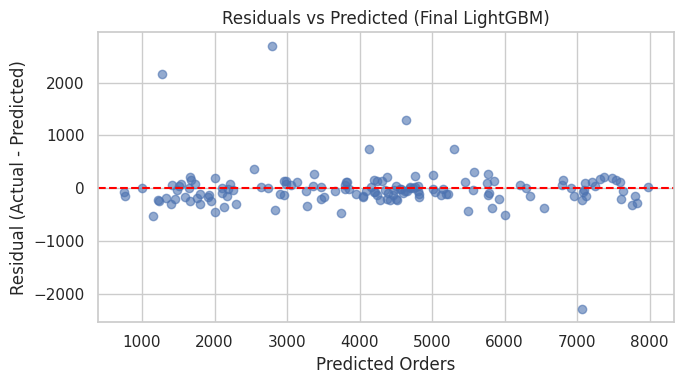


Top 10 feature importances (LightGBM):
            feature  importance
      hour_resouces        1079
resource_efficiency        1054
total_campaign_cost         888
       campaign_fee         816
         email_rate         652
    effective_price         561
              price         508
      campaign_type         336
      discount_rate         287
    resource_amount         133

✅ Final pipeline saved.
📁 final_pipeline_lgbm.pkl (model + scaler + features)
📁 final_test_predictions.csv (predictions + errors)


In [35]:
# -------------------------------
# FINALIZE: package final pipeline, evaluate, save predictions (Colab)
# -------------------------------

import joblib, numpy as np, pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Filenames from tuning step (update only if you renamed files)
lgb_fname = "tuned_lgbm_1763026042.pkl"   # correct tuned LightGBM file
gbr_fname = "tuned_gbr_1763026042.pkl"    # correct tuned GBR file
scaler_fname = "scaler_timestamped.pkl"   # correct scaler file

# Load scaler and final chosen model (LightGBM best model)
scaler = joblib.load(scaler_fname)
model = joblib.load(lgb_fname)

# Final pipeline object to save
final_pipeline = {
    "scaler": scaler,
    "model": model,
    "features": X.columns.tolist()
}

joblib.dump(final_pipeline, "final_pipeline_lgbm.pkl")
print("Saved final pipeline as: final_pipeline_lgbm.pkl")

# ---------------------------------------
# PREP TEST SET & MAKE PREDICTIONS
# ---------------------------------------

# Ensure X_test exists — use unscaled test data
X_test_unscaled = X_test.copy()
X_test_scaled_new = scaler.transform(X_test_unscaled)

# Predict
y_pred = model.predict(X_test_scaled_new)

# Define metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true_safe = np.where(np.array(y_true)==0, 1e-8, np.array(y_true))
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / y_true_safe)) * 100

# Compute metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse_v = rmse(y_test, y_pred)
mape_v = mape(y_test, y_pred)

print("\n===== FINAL MODEL PERFORMANCE (ON TEST SET) =====")
print(f"Model: LightGBM (tuned) -> {lgb_fname}")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse_v:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE (%): {mape_v:.2f}")

# ---------------------------------------
# SAVE PREDICTIONS CSV
# ---------------------------------------

preds_df = X_test_unscaled.copy().reset_index(drop=True)
preds_df['actual_orders'] = y_test.reset_index(drop=True)
preds_df['predicted_orders'] = np.round(y_pred).astype(int)
preds_df['residual'] = preds_df['actual_orders'] - preds_df['predicted_orders']
preds_df['abs_error'] = preds_df['residual'].abs()

# FIXED pct_error calculation
pct_error = preds_df['abs_error'] / preds_df['actual_orders'].replace(0, np.nan)
preds_df['pct_error'] = (pct_error * 100).fillna(0)

# Save file
preds_df.to_csv("final_test_predictions.csv", index=False)
print("\nSaved → final_test_predictions.csv")

# ---------------------------------------
# RESIDUALS PLOT
# ---------------------------------------

plt.figure(figsize=(7,4))
plt.scatter(preds_df['predicted_orders'], preds_df['residual'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Orders")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted (Final LightGBM)")
plt.tight_layout()
plt.show()

# ---------------------------------------
# FEATURE IMPORTANCE (TOP 10)
# ---------------------------------------

try:
    importances = model.feature_importances_
    fi = pd.DataFrame({
        "feature": X.columns,
        "importance": importances
    }).sort_values("importance", ascending=False)

    print("\nTop 10 feature importances (LightGBM):")
    print(fi.head(10).to_string(index=False))

except Exception as e:
    print("Could not extract feature importances:", e)

print("\n✅ Final pipeline saved.")
print("📁 final_pipeline_lgbm.pkl (model + scaler + features)")
print("📁 final_test_predictions.csv (predictions + errors)")
